<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Copy_of_TRAIN_YLC_Week_10_Homework_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 10: K-Nearest Neighbors II**
---

### **Description**
In this notebook, you will continue practicing with KNN with feature scaling and K-Folds Cross Validation.

<br>

### **Structure**
**Part 1**: [Real or Fake Money?](#p1)

**Part 2**: [Classifying Stars Revisited](#p2)






<br>

### **Learning Objectives**
By the end of this notebook, we will:
* Understand how to implement KNN models with sklearn and different K values.
* Recognize how to evaluate KNN models in sklearn.

<br>

### **Resources**
* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1QltUCIlM0FOkalov1aPXOkOVQme3Ot1AUThiSUbh-kI/edit?usp=drive_link)


* [Feature Scaling and K-Folds Cross Validation with sklearn](https://docs.google.com/document/d/1XCYdpH4jtrbKtCQvNRQPKI5H_UWFg4LiPdZ4qabHmfo/edit?usp=drive_link)


* [pandas Commands](https://docs.google.com/document/d/1xnKJsii1AsRH2t22XtrAh7FzSFGqAR0hAmW4oLYM4MI/edit)


* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1_3hzeIBPvcT6VC-eK-DDGVsKUvdVSvylNepoSLn2-T4/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

<a name = "p1"></a>

---
## **Part 1: Real or Fake Money?**
---

The provided dataset contains information about real and fake banknotes (paper money). Each row represents information about an image of one banknote. This data contains 5 columns:

* `range` is the range of patterns in the banknote image
* `asymmetry` is the lack of symmetry in the banknote image
* `outliers` is the amount of patterns that don't fit in with the rest in the banknote image
* `information` is the amount of total information believed to be contained in the banknote image
* `class` is 0 if the banknote is real and 1 if the banknote is fake

#### **Problem #1.1**

**Run the code below to load in data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRdRzlASrap1oY15IoQxXZnB5hi0RhIUCp_thFmTYOnJOw_xjR0X8sGDVyTSdPesIwqYEUQL_yelQpj/pub?gid=1496556477&single=true&output=csv"
banknote_df = pd.read_csv(url)

banknote_df.head()

,range,asymmetry,outliers,information,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### **Problem #1.2**

Split the data into a training and test set using `range` and `asymmetry` as the features to predict `class`.

In [ ]:
features = banknote_df[['range', 'asymmetry']]
labels = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### **Problem #1.3**

Create a standardized version of the training and test data.

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

#### **Problem #1.4**

Create a normalized version of the training and test data.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

#### **Problem #1.5**

Now it's time to model our data. Let's be particularly thorough and rigorous in this process by performing 10-Folds CV on the following models:

* 1NN on unscaled data. **NOTE**: This is provided for you.
* 1NN on standardized data.
* 1NN on normalized data.

* 5NN on unscaled data.
* 5NN on standardized data.
* 5NN on normalized data.

* 33NN on unscaled data. **NOTE**: $\sqrt{\text{length of training data}} \approx 33$
* 33NN on standardized data.
* 33NN on normalized data.

* 549NN on unscaled data. **NOTE**: ${\frac{1}{2}\text{(length of training data})} \approx 549$
* 549NN on standardized data.
* 549NN on normalized data.

* Any other models you would like to try.


<br>

**NOTE**: This may seem like a *lot*, but there's very little that will need to change for each model.

In [ ]:
# 1NN on unscaled data

knn_1_unscaled = KNeighborsClassifier(n_neighbors = 1)

scores_1_unscaled = cross_val_score(knn_1_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_unscaled.mean()) + " +/- " + str(scores_1_unscaled.std()))

10-Folds CV Scores: 0.9361467889908257 +/- 0.023171679421983307


In [ ]:
# 1NN on standardized data

knn_1_std = KNeighborsClassifier(n_neighbors=1)

scores_1_std = cross_val_score(knn_1_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_std.mean()) + " +/- " + str(scores_1_std.std()))

10-Folds CV Scores: 0.9361467889908257 +/- 0.027773700300244758


In [ ]:
# 1NN on normalized data

knn_1_norm = KNeighborsClassifier(n_neighbors=1)

scores_1_norm = cross_val_score(knn_1_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_norm.mean()) + " +/- " + str(scores_1_norm.std()))

10-Folds CV Scores: 0.9361384487072562 +/- 0.02779017152933597


In [ ]:
# 5NN on unscaled data

knn_5_unscaled = KNeighborsClassifier(n_neighbors = 5)

scores_5_unscaled = cross_val_score(knn_5_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_unscaled.mean()) + " +/- " + str(scores_5_unscaled.std()))

10-Folds CV Scores: 0.9361634695579649 +/- 0.02007907290279617


In [ ]:
# 5NN on standardized data

knn_5_std = KNeighborsClassifier(n_neighbors=5)

scores_5_std = cross_val_score(knn_5_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_std.mean()) + " +/- " + str(scores_5_std.std()))

10-Folds CV Scores: 0.9279566305254379 +/- 0.02572086660436224


In [ ]:
# 5NN on normalized data

knn_5_norm = KNeighborsClassifier(n_neighbors=5)

scores_5_norm = cross_val_score(knn_5_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_norm.mean()) + " +/- " + str(scores_5_norm.std()))

10-Folds CV Scores: 0.9279566305254379 +/- 0.02572086660436224


In [ ]:
# 33NN on unscaled data

knn_33_unscaled = KNeighborsClassifier(n_neighbors = 33)

scores_33_unscaled = cross_val_score(knn_33_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_unscaled.mean()) + " +/- " + str(scores_33_unscaled.std()))

10-Folds CV Scores: 0.9315929941618014 +/- 0.030718540426135598


In [ ]:
# 33NN on standardized data

knn_33_std = KNeighborsClassifier(n_neighbors=33)

scores_33_std = cross_val_score(knn_33_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_std.mean()) + " +/- " + str(scores_33_std.std()))

10-Folds CV Scores: 0.9297831526271892 +/- 0.026583466914907386


In [ ]:
# 33NN on normalized data

knn_33_norm = KNeighborsClassifier(n_neighbors=33)

scores_33_norm = cross_val_score(knn_33_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_33_norm.mean()) + " +/- " + str(scores_33_norm.std()))

10-Folds CV Scores: 0.9325187656380317 +/- 0.027244106612804134


In [ ]:
# 549NN on unscaled data

knn_549_unscaled = KNeighborsClassifier(n_neighbors = 549)

scores_549_unscaled = cross_val_score(knn_549_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_549_unscaled.mean()) + " +/- " + str(scores_549_unscaled.std()))

10-Folds CV Scores: 0.7893828190158466 +/- 0.05933224094993896


In [ ]:
# 549NN on standardized data

knn_549_std = KNeighborsClassifier(n_neighbors=549)

scores_549_std = cross_val_score(knn_549_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_549_std.mean()) + " +/- " + str(scores_549_std.std()))

10-Folds CV Scores: 0.8851292743953294 +/- 0.03395308954075646


In [ ]:
# 549NN on normalized data

knn_549_norm = KNeighborsClassifier(n_neighbors=549)

scores_549_norm = cross_val_score(knn_5_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_549_norm.mean()) + " +/- " + str(scores_549_norm.std()))

10-Folds CV Scores: 0.9279566305254379 +/- 0.02572086660436224


#### **Visualize the scores by running the cell below.**

**NOTE**: You will need to update the variable names here if they do not match with what you named the list of cross validation scores you used in any case.

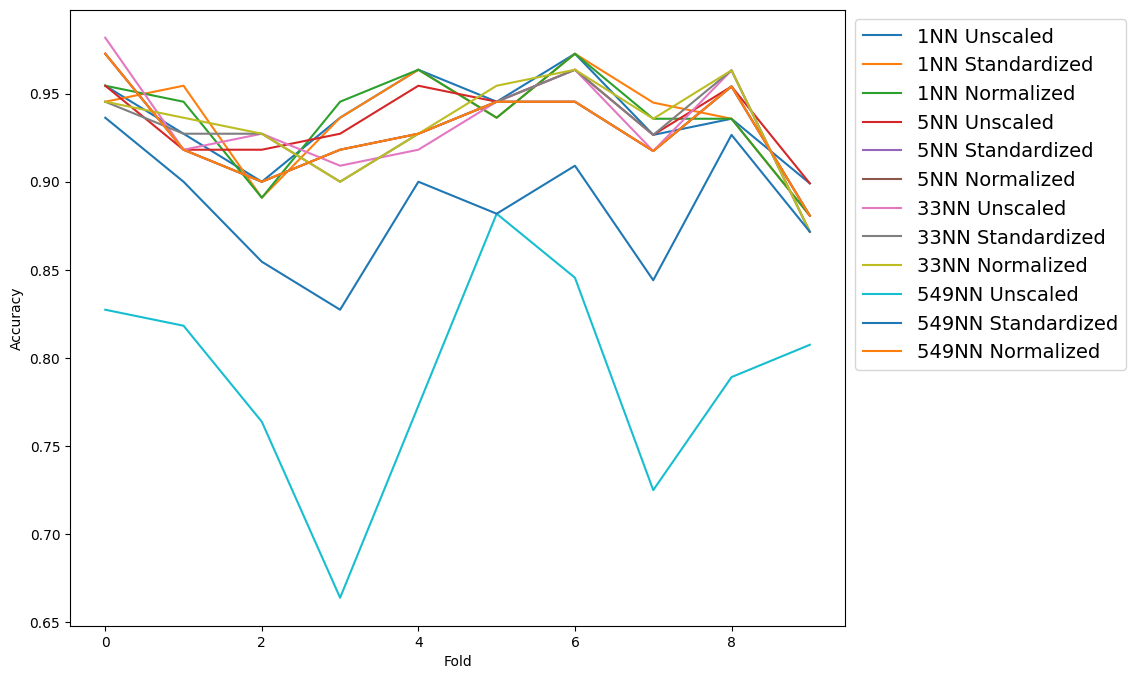

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_1_unscaled, label = '1NN Unscaled')
plt.plot(scores_1_std, label = '1NN Standardized')
plt.plot(scores_1_norm, label = '1NN Normalized')

plt.plot(scores_5_unscaled, label = '5NN Unscaled')
plt.plot(scores_5_std, label = '5NN Standardized')
plt.plot(scores_5_norm, label = '5NN Normalized')

plt.plot(scores_33_unscaled, label = '33NN Unscaled')
plt.plot(scores_33_std, label = '33NN Standardized')
plt.plot(scores_33_norm, label = '33NN Normalized')

plt.plot(scores_549_unscaled, label = '549NN Unscaled')
plt.plot(scores_549_std, label = '549NN Standardized')
plt.plot(scores_549_norm, label = '549NN Normalized')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

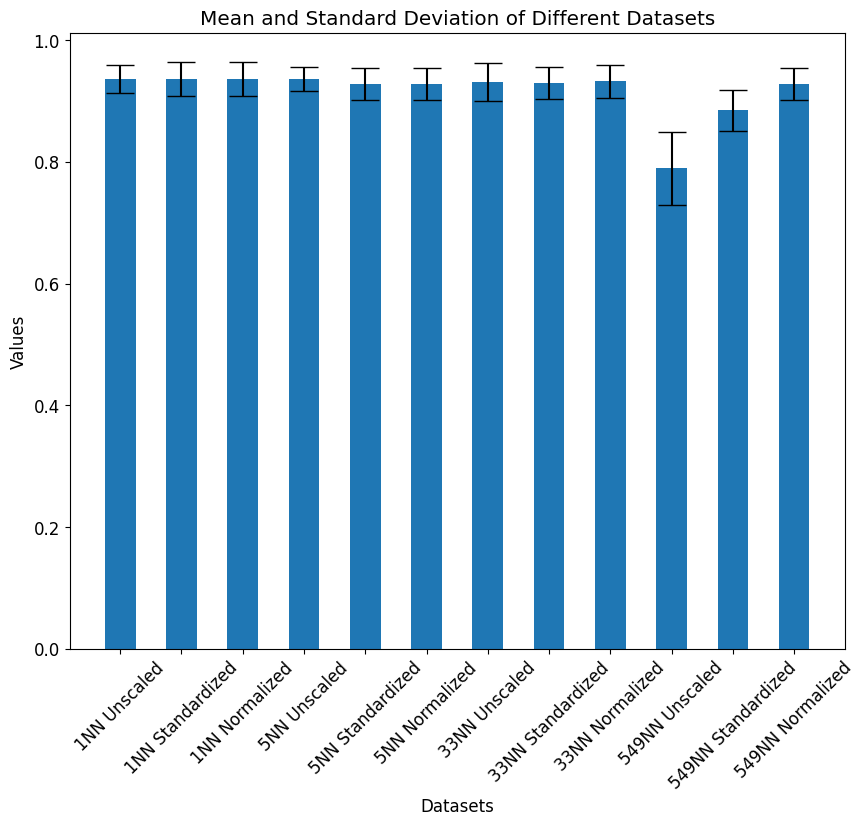

In [ ]:
# Calculate mean and standard deviation for each data set
scores = [scores_1_unscaled, scores_1_std, scores_1_norm,
          scores_5_unscaled, scores_5_std, scores_5_norm,
          scores_33_unscaled, scores_33_std, scores_33_norm,
          scores_549_unscaled, scores_549_std, scores_549_norm]

mean_values = [np.mean(score) for score in scores]
std_dev_values = [np.std(score) for score in scores]

# Labels for the bars
labels = ['1NN Unscaled', '1NN Standardized', '1NN Normalized',
          '5NN Unscaled', '5NN Standardized', '5NN Normalized',
          '33NN Unscaled', '33NN Standardized', '33NN Normalized',
          '549NN Unscaled', '549NN Standardized', '549NN Normalized']

# Bar width
bar_width = 0.5

# Plotting
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (10, 8))

# Bar plots with error bars representing standard deviations
ax.bar(labels, mean_values, bar_width, yerr=std_dev_values, capsize=10)

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Different Datasets')

# Show the plot
plt.xticks(rotation = 45)
plt.show()

#### **Problem #1.6**

Choose the best model from above by considering all the information from the outputs and the graphs, train it on the whole training set, and evaluate it on the test set using the accuracy and confusion matrix.

In [ ]:
knn_5_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_5_unscaled.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_5_unscaled.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy on Test Set: 0.9382

Confusion Matrix:
[[141   7]
 [ 10 117]]


<a name = "p2"></a>

---
## **Part 2: Classifying Stars Revisited**
---

In this section, you can revisit the stars dataset from last week to properly model this dataset with your newfound hyperparameter tuning and validation skillset.

#### **Problem #2.1**

**Run the code below to load in data.**

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCZgoegOHa49SFXYU-ZZTdCkgTp0sneU1BsEOa7vusjTXPPLcn0i3kXhX1nyqkApJHCKTkw0mWuWr4/pub?gid=753880827&single=true&output=csv'
stars_df = pd.read_csv(url)

stars_df.head()

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,Red,0
1,3042,0.000500,0.1542,Red,0
2,2600,0.000300,0.1020,Red,0
3,2800,0.000200,0.1600,Red,0
4,1939,0.000138,0.1030,Red,0


#### **Problem #2.2**

Split the data into a training and test set using `temperature` and `size` as the features to predict `class`.

In [ ]:
features = stars_df[['temperature', 'size']]
labels = stars_df['class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### **Problem #2.3**

Create a standardized version of the training and test data.

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

#### **Problem #2.4**

Create a normalized version of the training and test data.

In [ ]:
norm_scaler = MinMaxScaler()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

#### **Problem #2.5**

Now it's time to model our data. Let's be particularly thorough and rigorous in this process by performing 10-Folds CV on the following models:

* 1NN on unscaled data. **NOTE**: This is provided for you.
* 1NN on standardized data.
* 1NN on normalized data.

* 5NN on unscaled data.
* 5NN on standardized data.
* 5NN on normalized data.

* 15NN on unscaled data. **NOTE**: $\sqrt{\text{length of training data}} \approx 15$
* 15NN on standardized data.
* 15NN on normalized data.

* 107NN on unscaled data. **NOTE**: ${\frac{1}{2}\text{(length of training data})} \approx 107$
* 107NN on standardized data.
* 107NN on normalized data.

* Any other models you would like to try.


<br>

**NOTE**: This may seem like a *lot*, but there's very little that will need to change for each model.

In [ ]:
# 1NN on unscaled data

knn_1_unscaled = KNeighborsClassifier(n_neighbors = 1)

scores_1_unscaled = cross_val_score(knn_1_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_unscaled.mean()) + " +/- " + str(scores_1_unscaled.std()))

10-Folds CV Scores: 0.5626315789473684 +/- 0.0683481392873597


In [ ]:
# 1NN on standardized data

knn_1_std = KNeighborsClassifier(n_neighbors=1)

scores_1_std = cross_val_score(knn_1_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_std.mean()) + " +/- " + str(scores_1_std.std()))

10-Folds CV Scores: 0.7189473684210526 +/- 0.0500526039072368


In [ ]:
# 1NN on normalized data

knn_1_norm = KNeighborsClassifier(n_neighbors=1)

scores_1_norm = cross_val_score(knn_1_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1_norm.mean()) + " +/- " + str(scores_1_norm.std()))

10-Folds CV Scores: 0.7294736842105263 +/- 0.05264210421073679


In [ ]:
# 5NN on unscaled data

knn_5_unscaled = KNeighborsClassifier(n_neighbors = 5)

scores_5_unscaled = cross_val_score(knn_5_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_unscaled.mean()) + " +/- " + str(scores_5_unscaled.std()))

10-Folds CV Scores: 0.5205263157894737 +/- 0.08201749695092007


In [ ]:
# 5NN on standardized data

knn_5_std = KNeighborsClassifier(n_neighbors=5)

scores_5_std = cross_val_score(knn_5_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_std.mean()) + " +/- " + str(scores_5_std.std()))

10-Folds CV Scores: 0.625 +/- 0.09608146647218693


In [ ]:
# 5NN on normalized data

knn_5_norm = KNeighborsClassifier(n_neighbors=5)

scores_5_norm = cross_val_score(knn_5_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5_norm.mean()) + " +/- " + str(scores_5_norm.std()))

10-Folds CV Scores: 0.625 +/- 0.09608146647218693


In [ ]:
# 15NN on unscaled data

knn_15_unscaled = KNeighborsClassifier(n_neighbors = 15)

scores_15_unscaled = cross_val_score(knn_15_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_15_unscaled.mean()) + " +/- " + str(scores_15_unscaled.std()))

10-Folds CV Scores: 0.5621052631578948 +/- 0.11685632914844564


In [ ]:
# 15NN on standardized data

knn_15_std = KNeighborsClassifier(n_neighbors=15)

scores_15_std = cross_val_score(knn_15_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_15_std.mean()) + " +/- " + str(scores_15_std.std()))

10-Folds CV Scores: 0.5884210526315788 +/- 0.11164347687159264


In [ ]:
# 15NN on normalized data

knn_15_norm = KNeighborsClassifier(n_neighbors=15)

scores_15_norm = cross_val_score(knn_15_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_15_norm.mean()) + " +/- " + str(scores_15_norm.std()))

10-Folds CV Scores: 0.5936842105263158 +/- 0.10981727457469453


In [ ]:
# 107NN on unscaled data

knn_107_unscaled = KNeighborsClassifier(n_neighbors = 107)

scores_107_unscaled = cross_val_score(knn_107_unscaled, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_107_unscaled.mean()) + " +/- " + str(scores_107_unscaled.std()))

10-Folds CV Scores: 0.27631578947368424 +/- 0.04179159480232698


In [ ]:
# 107NN on standardized data

knn_107_std = KNeighborsClassifier(n_neighbors=107)

scores_107_std = cross_val_score(knn_107_std, X_train_std, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_107_std.mean()) + " +/- " + str(scores_107_std.std()))

10-Folds CV Scores: 0.2707894736842106 +/- 0.0384687879381371


In [ ]:
# 107NN on normalized data

knn_107_norm = KNeighborsClassifier(n_neighbors=107)

scores_107_norm = cross_val_score(knn_107_norm, X_train_norm, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_107_norm.mean()) + " +/- " + str(scores_107_norm.std()))

10-Folds CV Scores: 0.2707894736842106 +/- 0.0384687879381371


#### **Visualize the scores by running the cell below.**

**NOTE**: You will need to update the variable names here if they do not match with what you named the list of cross validation scores you used in any case.

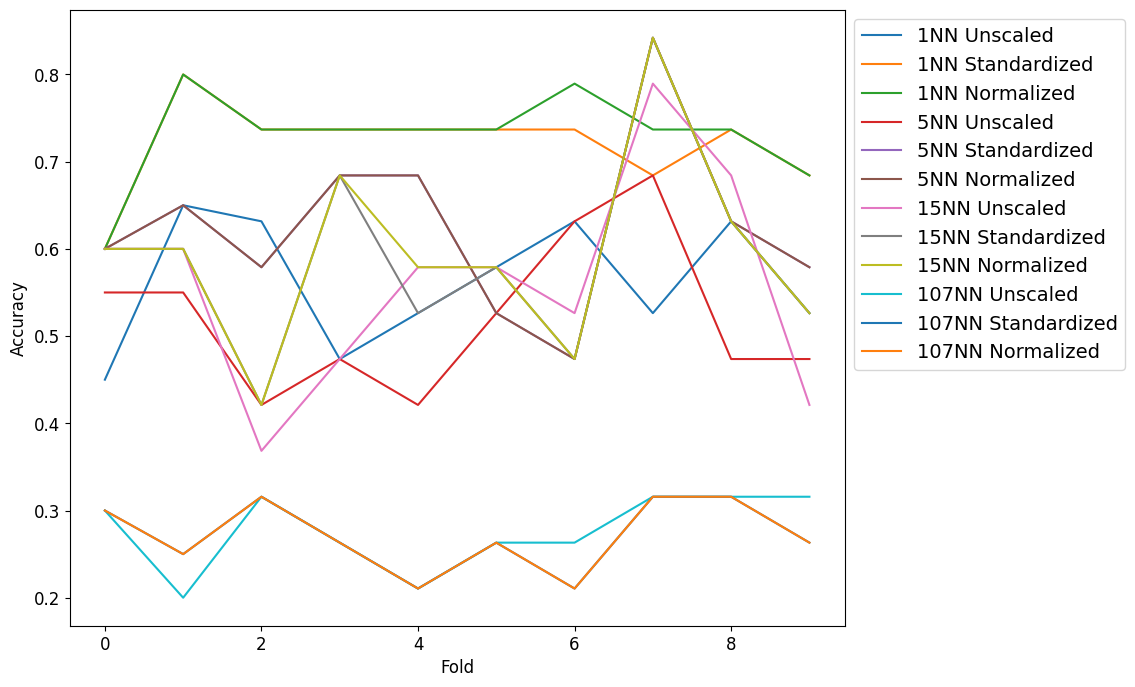

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_1_unscaled, label = '1NN Unscaled')
plt.plot(scores_1_std, label = '1NN Standardized')
plt.plot(scores_1_norm, label = '1NN Normalized')

plt.plot(scores_5_unscaled, label = '5NN Unscaled')
plt.plot(scores_5_std, label = '5NN Standardized')
plt.plot(scores_5_norm, label = '5NN Normalized')

plt.plot(scores_15_unscaled, label = '15NN Unscaled')
plt.plot(scores_15_std, label = '15NN Standardized')
plt.plot(scores_15_norm, label = '15NN Normalized')

plt.plot(scores_107_unscaled, label = '107NN Unscaled')
plt.plot(scores_107_std, label = '107NN Standardized')
plt.plot(scores_107_norm, label = '107NN Normalized')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

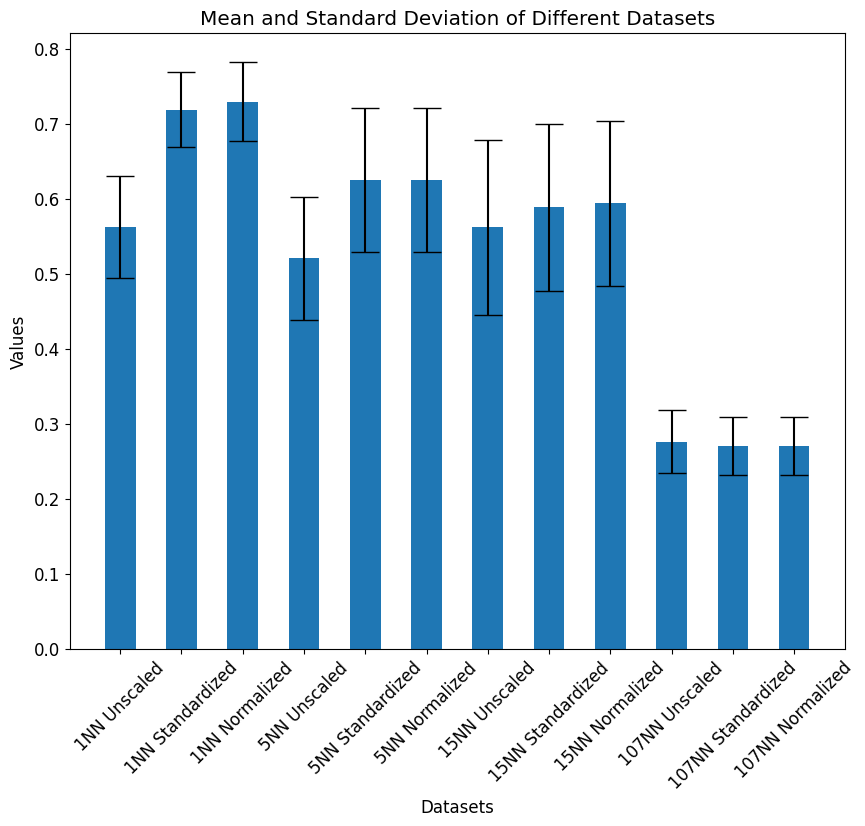

In [ ]:
# Calculate mean and standard deviation for each data set
scores = [scores_1_unscaled, scores_1_std, scores_1_norm,
          scores_5_unscaled, scores_5_std, scores_5_norm,
          scores_15_unscaled, scores_15_std, scores_15_norm,
          scores_107_unscaled, scores_107_std, scores_107_norm]

mean_values = [np.mean(score) for score in scores]
std_dev_values = [np.std(score) for score in scores]

# Labels for the bars
labels = ['1NN Unscaled', '1NN Standardized', '1NN Normalized',
          '5NN Unscaled', '5NN Standardized', '5NN Normalized',
          '15NN Unscaled', '15NN Standardized', '15NN Normalized',
          '107NN Unscaled', '107NN Standardized', '107NN Normalized']

# Bar width
bar_width = 0.5

# Plotting
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (10, 8))

# Bar plots with error bars representing standard deviations
ax.bar(labels, mean_values, bar_width, yerr=std_dev_values, capsize=10)

# Adding labels and title
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Different Datasets')

# Show the plot
plt.xticks(rotation = 45)
plt.show()

#### **Problem #2.6**

Choose the best model from above by considering all the information from the outputs and the graphs, train it on the whole training set, and evaluate it on the test set using the accuracy and confusion matrix.

In [ ]:
knn_1_norm = KNeighborsClassifier(n_neighbors=1)
knn_1_norm.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_1_norm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy on Test Set: 0.5833

Confusion Matrix:
[[6 2 0 0 0 0]
 [3 4 0 0 0 0]
 [0 0 3 2 1 0]
 [0 0 2 4 2 0]
 [0 1 5 0 2 0]
 [0 0 1 1 0 9]]


---

# End of Notebook

© 2023 The Coding School, All rights reserved